

#### PERFORMANCE ANALYSIS OF MACHINE LEARNING ALGORITHMS FOR MONITORING HUMAN ACTIVITY RECOGNITION 





### RANDOM FOREST ALGORITHM


The purpose of this thesis is to predict human behavior based upon wearable sensor data and Smartphone data and perform a comparative study of performance between multiple classification algorithms. We will be using publicly available UCI data set for this study. As this data is not derived from our experiment, so it becomes crucial to check the dataset for all the data quality issues. Otherwise, data quality issues can provide irrelevant results, so in order to prepare data for building models,

1. Data load
2. Standardization of the datset
3. Splitting of Original Dataset between test and train
4. Model Building

**** 1. Data Load***

***

In [1]:
### import all the required Library

import pandas as pd
import numpy as np
import glob
import missingno as msno 
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load the data 
train_PCA=pd.read_csv("train_PCA.csv")
test_PCA=pd.read_csv("test_PCA.csv")


In [3]:
train_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,Activity1
0,-16.138544,2.152024,3.144780,-0.272464,6.798938,-4.249394,2.937159,-4.905413,-0.775515,-3.627737,0.073011,0.889376,1.267949,-0.946696,2.790675,0.898439,-1.700568,-3.939219,2.127305,-0.075840,2.831640,3.298593,0.565132,-1.654967,-0.279873,-4.124464,0.617781,-0.505089,1.903868,-2.045921,-0.438302,2.059163,-0.586914,-2.905170,-1.332684,-0.716849,0.394759,-1.377355,1.254395,-0.032640,0.622189,3.416984,0.519672,0.890775,1.759673,-1.081023,0.969435,-1.871808,-0.219295,0.446969,1.049276,1.566399,-0.971318,-1.202504,-1.453239,0.518271,1.069088,1.015405,0.233400,-0.770759,0.067950,0.382774,-1.078217,0.841281,-1.061968,-2.950060,0.694181,-1.070782,-1.079123,-2.431249,1.297764,-0.244076,0.341539,-0.387978,2.622507,0.118285,1.673259,0.632994,1.933444,-1.227413,0.280572,-0.892259,0.759921,2.325190,0.538367,-0.263861,1.529397,-2.112664,0.714236,0.217711,0.436955,0.873826,-1.835069,-0.165438,1.318898,-0.161542,0.427557,1.337350,2.258507,-1.681535,-1.209325,-1.175727,2
1,-15.296194,1.387144,-0.682221,2.813677,4.266170,-2.055663,0.011205,-1.845985,0.492546,-0.180175,-1.162966,-0.000874,0.033700,0.825427,0.432975,-1.303282,0.693087,-0.060562,0.991346,0.074259,1.424176,1.579882,1.225787,0.073037,-1.178698,0.703850,-0.368236,-1.281543,-0.555393,0.308221,-0.010071,-0.769798,-1.032599,1.030560,-0.631695,0.199232,-0.984377,1.089938,0.775183,0.935021,0.355830,-1.131484,-0.766894,-0.062532,-0.287692,0.155131,-0.322166,-1.448517,0.011421,-0.018256,-1.402988,0.885552,0.597541,-0.512490,-1.873529,0.104559,-1.380235,-0.028460,1.127166,-0.120667,0.233644,0.106987,-0.034963,0.075742,-0.793439,-1.380629,-0.490613,0.090467,-0.816043,0.020237,0.136965,1.153165,0.879996,0.329076,0.589990,0.432374,-0.801875,-0.142032,1.468312,-0.004204,0.883611,-1.094627,-0.124604,-0.278868,-0.235820,0.358985,0.859530,-1.177882,0.006624,-0.128899,-0.607102,0.007449,0.982101,-0.446051,0.683640,-0.624820,0.347661,-0.752347,0.156624,-1.347392,0.149474,-0.730615,2
2,-15.137019,2.473351,-1.756641,3.717974,4.181557,-1.357518,0.072947,-1.388188,0.539754,-0.671712,-0.674189,-0.374583,0.462872,-1.411818,0.839212,-0.495808,-0.249115,0.879679,0.226115,-0.066216,0.308190,0.525031,0.712462,-0.148489,-0.364532,0.994000,-1.116587,-0.700144,1.040828,-0.484768,1.531433,-1.428417,-1.643945,0.418929,-0.138030,-0.248785,-0.822426,0.922881,0.666259,1.717076,0.893014,-0.782479,1.058024,-0.386005,-0.406526,1.836340,-0.840323,0.550357,-0.027314,-0.353594,-0.958994,1.195139,0.003569,-0.359448,0.534305,-0.501512,0.472763,0.865773,-0.663759,-1.272343,-0.424568,-1.153452,0.465598,0.956074,-0.506852,0.016217,0.190644,-0.148580,0.692967,-0.344685,-0.007561,-0.089110,0.105538,0.809187,-0.513003,0.742428,0.286503,-0.639285,0.784495,0.775622,-0.568533,0.412346,0.657089,0.199057,-0.364902,-1.418811,1.207067,-0.599428,-2.047129,0.146366,-0.039973,0.013442,-0.961786,0.194423,-0.488807,-0.138448,0.140349,0.436761,0.280990,0.138031,0.662263,-0.227418,2
3,-15.350884,3.915681,-1.790322,2.567521,3.205840,-0.942944,0.530736,-1.832185,1.071517,-1.496989,-0.135517,-0.275294,-1.354674,-0.261084,-0.632981,1.429589,0.009838,-0.355311,-1.341817,-0.537152,-0.739978,1.451162,-0.614207,-2.187956,-0.429484,1.376196,-1.228455,1.021709,0.885322,0.376691,1.971524,-1.626024,1.124302,0.413288,-0.723184,0.097952,0.082694,1.112342,-0.531609,-0.251708,0.227108,-0.213008,0.509645,-1.714106,0.788611,1.555920,0.087584,0.940707,0.664384,-1.007306,-1.276590,1.468136,0.969931,-0.116972,-0.433841,1.314230,0.891354,0.237260,-0.953606,-1.873607,-0.774201,-2.234938,0.801518,1.379364,5.822232,-0.106192,-3.204156,0.299764,1.451850,0.328450,-3.040891,-2.435640,-0.168577,0.052123,3.346570,1.231708,-0.815718,2.460084,0.905585,0.254265,-0.411390,0.

In [4]:
test_PCA.shape

(2947, 103)

**2. Divide between X and Y**

In [5]:
Output =['Activity1']

In [6]:
## Devide the data between X and Y
## Devide the data between X and Y
X_train= train_PCA.drop(Output,1)
Y_train= train_PCA[Output]

X_test= test_PCA.drop(Output,1)
Y_test= test_PCA[Output]

In [7]:
## Print X after normalization
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,-16.138544,2.152024,3.144780,-0.272464,6.798938,-4.249394,2.937159,-4.905413,-0.775515,-3.627737,0.073011,0.889376,1.267949,-0.946696,2.790675,0.898439,-1.700568,-3.939219,2.127305,-0.075840,2.831640,3.298593,0.565132,-1.654967,-0.279873,-4.124464,0.617781,-0.505089,1.903868,-2.045921,-0.438302,2.059163,-0.586914,-2.905170,-1.332684,-0.716849,0.394759,-1.377355,1.254395,-0.032640,0.622189,3.416984,0.519672,0.890775,1.759673,-1.081023,0.969435,-1.871808,-0.219295,0.446969,1.049276,1.566399,-0.971318,-1.202504,-1.453239,0.518271,1.069088,1.015405,0.233400,-0.770759,0.067950,0.382774,-1.078217,0.841281,-1.061968,-2.950060,0.694181,-1.070782,-1.079123,-2.431249,1.297764,-0.244076,0.341539,-0.387978,2.622507,0.118285,1.673259,0.632994,1.933444,-1.227413,0.280572,-0.892259,0.759921,2.325190,0.538367,-0.263861,1.529397,-2.112664,0.714236,0.217711,0.436955,0.873826,-1.835069,-0.165438,1.318898,-0.161542,0.427557,1.337350,2.258507,-1.681535,-1.209325,-1.175727
1,-15.296194,1.387144,-0.682221,2.813677,4.266170,-2.055663,0.011205,-1.845985,0.492546,-0.180175,-1.162966,-0.000874,0.033700,0.825427,0.432975,-1.303282,0.693087,-0.060562,0.991346,0.074259,1.424176,1.579882,1.225787,0.073037,-1.178698,0.703850,-0.368236,-1.281543,-0.555393,0.308221,-0.010071,-0.769798,-1.032599,1.030560,-0.631695,0.199232,-0.984377,1.089938,0.775183,0.935021,0.355830,-1.131484,-0.766894,-0.062532,-0.287692,0.155131,-0.322166,-1.448517,0.011421,-0.018256,-1.402988,0.885552,0.597541,-0.512490,-1.873529,0.104559,-1.380235,-0.028460,1.127166,-0.120667,0.233644,0.106987,-0.034963,0.075742,-0.793439,-1.380629,-0.490613,0.090467,-0.816043,0.020237,0.136965,1.153165,0.879996,0.329076,0.589990,0.432374,-0.801875,-0.142032,1.468312,-0.004204,0.883611,-1.094627,-0.124604,-0.278868,-0.235820,0.358985,0.859530,-1.177882,0.006624,-0.128899,-0.607102,0.007449,0.982101,-0.446051,0.683640,-0.624820,0.347661,-0.752347,0.156624,-1.347392,0.149474,-0.730615
2,-15.137019,2.473351,-1.756641,3.717974,4.181557,-1.357518,0.072947,-1.388188,0.539754,-0.671712,-0.674189,-0.374583,0.462872,-1.411818,0.839212,-0.495808,-0.249115,0.879679,0.226115,-0.066216,0.308190,0.525031,0.712462,-0.148489,-0.364532,0.994000,-1.116587,-0.700144,1.040828,-0.484768,1.531433,-1.428417,-1.643945,0.418929,-0.138030,-0.248785,-0.822426,0.922881,0.666259,1.717076,0.893014,-0.782479,1.058024,-0.386005,-0.406526,1.836340,-0.840323,0.550357,-0.027314,-0.353594,-0.958994,1.195139,0.003569,-0.359448,0.534305,-0.501512,0.472763,0.865773,-0.663759,-1.272343,-0.424568,-1.153452,0.465598,0.956074,-0.506852,0.016217,0.190644,-0.148580,0.692967,-0.344685,-0.007561,-0.089110,0.105538,0.809187,-0.513003,0.742428,0.286503,-0.639285,0.784495,0.775622,-0.568533,0.412346,0.657089,0.199057,-0.364902,-1.418811,1.207067,-0.599428,-2.047129,0.146366,-0.039973,0.013442,-0.961786,0.194423,-0.488807,-0.138448,0.140349,0.436761,0.280990,0.138031,0.662263,-0.227418
3,-15.350884,3.915681,-1.790322,2.567521,3.205840,-0.942944,0.530736,-1.832185,1.071517,-1.496989,-0.135517,-0.275294,-1.354674,-0.261084,-0.632981,1.429589,0.009838,-0.355311,-1.341817,-0.537152,-0.739978,1.451162,-0.614207,-2.187956,-0.429484,1.376196,-1.228455,1.021709,0.885322,0.376691,1.971524,-1.626024,1.124302,0.413288,-0.723184,0.097952,0.082694,1.112342,-0.531609,-0.251708,0.227108,-0.213008,0.509645,-1.714106,0.788611,1.555920,0.087584,0.940707,0.664384,-1.007306,-1.276590,1.468136,0.969931,-0.116972,-0.433841,1.314230,0.891354,0.237260,-0.953606,-1.873607,-0.774201,-2.234938,0.801518,1.379364,5.822232,-0.106192,-3.204156,0.299764,1.451850,0.328450,-3.040891,-2.435640,-0.168577,0.052123,3.346570,1.231708,-0.815718,2.460084,0.905585,0.254265,-0.411390,0.968574,1.293994,

In [8]:
Y_test.shape

(2947, 1)

In [9]:
Model_Name="Random Forest Classifier"

#### 4. Model build & Evaluation 

- *We will be buidling below model and do the comparison between these model* 

1. Logistics Regression
2. KNN Classification Algorithm
3. SVM Algorithm
4. Random Forest
5. GBM
5. Deep Neural Network

**1.Random Forest CLassification Hyper tunning parameter**

In [10]:
import time


In [11]:
# Creating the hyperparameter grid 

import time

## hypertune Parametr for KNN Model
## hypertune Parametr for KNN Model
#n_neighbors=list(range(1, 10))
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1,5,10,15,20,25,30,100,200],
    }

print(param_grid)

Rnn=RandomForestClassifier()

# instantiate the grid
grid = GridSearchCV(Rnn, param_grid, cv=5, scoring='accuracy')



start_time = time.time()
  
grid_result =grid.fit(X_train,Y_train)







{'bootstrap': [True], 'max_depth': [1, 5, 10, 15, 20, 25, 30, 100, 200]}


In [12]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.805767 using {'bootstrap': True, 'max_depth': 200}
Execution time: 37.13971996307373 ms


In [13]:
cv_results = pd.DataFrame(grid_result.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093994,0.009239,0.011727,0.015733,True,1,"{'bootstrap': True, 'max_depth': 1}",0.457938,0.441196,0.403401,0.360109,0.622616,0.457018,0.089315,9,0.498979,0.464207,0.425366,0.441951,0.566961,0.479493,0.050206
1,0.240504,0.008835,0.003793,0.001402,True,5,"{'bootstrap': True, 'max_depth': 5}",0.778833,0.751869,0.789796,0.728387,0.805858,0.770947,0.027597,8,0.859646,0.837103,0.846821,0.826449,0.831747,0.840353,0.011764
2,0.558239,0.173168,0.005975,0.005556,True,10,"{'bootstrap': True, 'max_depth': 10}",0.781547,0.789939,0.798639,0.781484,0.831063,0.796518,0.018383,4,0.964954,0.965992,0.966168,0.968044,0.972638,0.967559,0.002728
3,0.940577,0.074271,0.010336,0.001567,True,15,"{'bootstrap': True, 'max_depth': 15}",0.805970,0.804895,0.813605,0.758339,0.803815,0.797334,0.019788,2,0.993875,0.994219,0.995070,0.992351,0.996091,0.994321,0.001248
4,0.983591,0.022220,0.012535,0.003291,True,20,"{'bootstrap': True, 'max_depth': 20}",0.793758,0.762067,0.807483,0.771273,0.824932,0.791893,0.023026,7,0.997618,0.998300,0.998470,0.997450,0.998131,0.997994,0.000394
5,1.009253,0.031335,0.009599,0.005950,True,25,"{'bootstrap': True, 'max_depth': 25}",0.784261,0.791978,0.822449,0.754255,0.831063,0.796790,0.027637,3,0.997958,0.998130,0.998810,0.997280,0.997961,0.998028,0.000488
6,1.012352,0.018966,0.009466,0.001896,True,30,"{'bootstrap': True, 'max_depth': 30}",0.778833,0.766145,0.812245,0.788972,0.822888,0.793798,0.020966,5,0.997788,0.999150,0.998470,0.998130,0.998810,0.998470,0.000481
7,1.000706,0.031783,0.010879,0.001698,True,100,"{'bootstrap': True, 'max_depth': 100}",0.789688,0.772944,0.819048,0.768550,0.814714,0.792982,0.020783,6,0.998129,0.998810,0.998980,0.997790,0.998300,0.998402,0.000438
8,1.005814,0.030288,0.011958,0.003296,True,200,"{'bootstrap': True, 'max_depth': 200}",0.793080,0.802175,0.818367,0.781484,0.833787,0.805767,0.018471,1,0.997278,0.998470,0.997790,0.998130,0.997111,0.997756,0.000509


In [14]:
k=cv_results[['param_max_depth','mean_test_score','mean_train_score']]
File_Name=Model_Name+'_Hypertune.csv'
k.to_csv(File_Name,index=False)

Text(0.5, 0, 'param_max_depth')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and Max Depth')

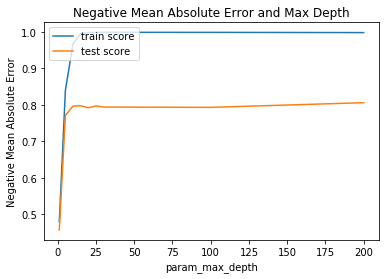

In [15]:
# plotting mean test and train scoes with alpha 


# plotting
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('param_max_depth')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Max Depth")
plt.legend(['train score', 'test score'], loc='upper left')
#plt.show()
File_Name=Model_Name+'_HyperTune.png'
plt.savefig(File_Name)

In [16]:
# Random Forest
import time

start_time = time.time()
Model1= RandomForestClassifier(bootstrap=True,
                             max_depth=25)


In [17]:
#fit model on Train data 
Model1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
Model1_duration=time.time()-start_time

In [19]:
Model1_duration

1.23586106300354

In [20]:
#Y = label_binarize(Y, classes=[1, 2, 3,4])
#n_classes = Y.shape[1]

In [21]:
## Predict train score for training data  
Y_train_pred=Model1.predict(X_train)

In [22]:
Y_test_pred=Model1.predict(X_test)

In [23]:
## Confusion matrix for Logistics regression
cm_Model = metrics.confusion_matrix(Y_test,Y_test_pred,labels=[0, 1, 2,3,4,5])
print(cm_Model)

[[506  25   5   0   1   0]
 [ 12 365 109   1   1   3]
 [  2  97 432   1   0   0]
 [  0   0   1 426  52  17]
 [  5   2   2  64 304  43]
 [  0   2   0  53  50 366]]


In [24]:
#cm_logreg = pd.DataFrame(cm_logreg, index=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"], columns=["Sit On Bed", "Sit on Chair", "Lying", "Ambulating"])

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'Actual label')

Text(0.5, 0, 'Predicted label')

Text(0.5, 1.05, 'Accuracy Score: 0.8140481845945029')

<Figure size 720x720 with 0 Axes>

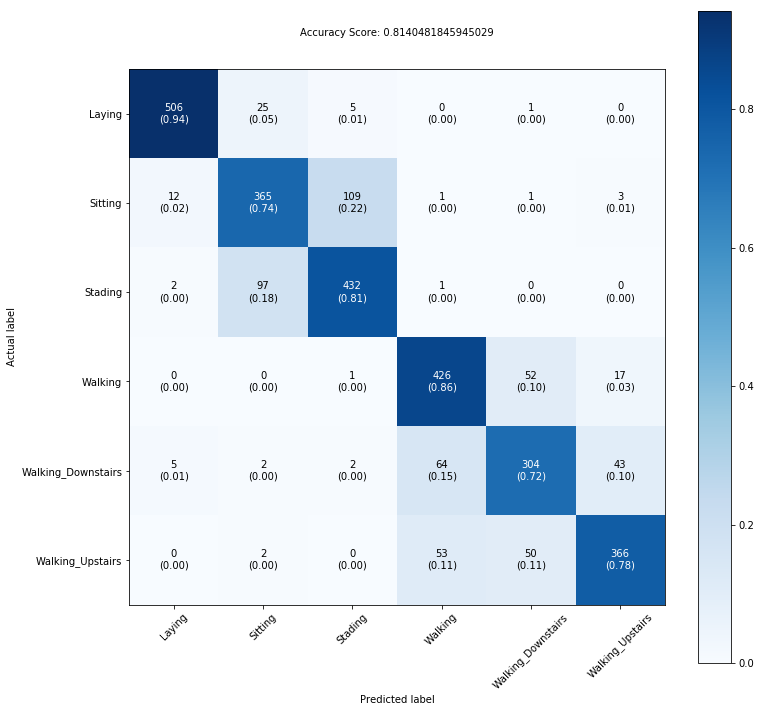

In [25]:
from mlxtend.plotting import plot_confusion_matrix

plt.figure(figsize=(10,10))
class_names=["Laying","Sitting","Stading","Walking","Walking_Downstairs","Walking_Upstairs"]
ax = plot_confusion_matrix(cm_Model,
                                colorbar=True,show_normed=True ,class_names=class_names,figsize=(12,12))
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Model1.score(X_test, Y_test))
plt.title(all_sample_title, size = 10);
File_Name=Model_Name+'_Confusion.png'
#plt.show()
plt.savefig(File_Name)

#plt.show()

**precision**

 >The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
 
**Recall** 
 >The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**F-beta score**
 >The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.


In [26]:
from sklearn.metrics import classification_report
classificationReport = classification_report(Y_test, Y_test_pred, target_names=class_names,output_dict=True)

In [27]:
print(classificationReport)


{'Laying': {'precision': 0.9638095238095238, 'recall': 0.9422718808193669, 'f1-score': 0.9529190207156308, 'support': 537}, 'Sitting': {'precision': 0.7433808553971487, 'recall': 0.7433808553971487, 'f1-score': 0.7433808553971486, 'support': 491}, 'Stading': {'precision': 0.7868852459016393, 'recall': 0.8120300751879699, 'f1-score': 0.7992599444958373, 'support': 532}, 'Walking': {'precision': 0.781651376146789, 'recall': 0.8588709677419355, 'f1-score': 0.8184438040345823, 'support': 496}, 'Walking_Downstairs': {'precision': 0.7450980392156863, 'recall': 0.7238095238095238, 'f1-score': 0.7342995169082125, 'support': 420}, 'Walking_Upstairs': {'precision': 0.8531468531468531, 'recall': 0.7770700636942676, 'f1-score': 0.8133333333333334, 'support': 471}, 'micro avg': {'precision': 0.8140481845945029, 'recall': 0.8140481845945029, 'f1-score': 0.8140481845945028, 'support': 2947}, 'macro avg': {'precision': 0.8123286489362734, 'recall': 0.8095722277750353, 'f1-score': 0.8102727458141241, '

In [28]:
df_performance=pd.DataFrame(classificationReport)
df_performance=df_performance.reset_index()
print(df_performance)

       index      Laying     Sitting     Stading     Walking  \
0   f1-score    0.952919    0.743381    0.799260    0.818444   
1  precision    0.963810    0.743381    0.786885    0.781651   
2     recall    0.942272    0.743381    0.812030    0.858871   
3    support  537.000000  491.000000  532.000000  496.000000   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.812329   
2            0.723810          0.777070     0.814048     0.809572   
3          420.000000        471.000000  2947.000000  2947.000000   

   weighted avg  
0      0.814170  
1      0.815630  
2      0.814048  
3   2947.000000  


In [29]:
print(df_performance.head())

       index      Laying     Sitting     Stading     Walking  \
0   f1-score    0.952919    0.743381    0.799260    0.818444   
1  precision    0.963810    0.743381    0.786885    0.781651   
2     recall    0.942272    0.743381    0.812030    0.858871   
3    support  537.000000  491.000000  532.000000  496.000000   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.812329   
2            0.723810          0.777070     0.814048     0.809572   
3          420.000000        471.000000  2947.000000  2947.000000   

   weighted avg  
0      0.814170  
1      0.815630  
2      0.814048  
3   2947.000000  


In [30]:
#Logistics_df
df_performance.rename(columns={'index':'Perfomance Matrix'}, inplace=True)
df_performance

,Perfomance Matrix,Laying,Sitting,Stading,Walking,Walking_Downstairs,Walking_Upstairs,micro avg,macro avg,weighted avg
0,f1-score,0.952919,0.743381,0.799260,0.818444,0.734300,0.813333,0.814048,0.810273,0.814170
1,precision,0.963810,0.743381,0.786885,0.781651,0.745098,0.853147,0.814048,0.812329,0.815630
2,recall,0.942272,0.743381,0.812030,0.858871,0.723810,0.777070,0.814048,0.809572,0.814048
3,support,537.000000,491.000000,532.000000,496.000000,420.000000,471.000000,2947.000000,2947.000000,2947.000000


In [31]:
df_performance=df_performance.append({'Perfomance Matrix':"Training Accuracy" ,'macro avg' :Model1.score(X_train, Y_train) },ignore_index = True)
print(df_performance)    

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.952919    0.743381    0.799260    0.818444   
1          precision    0.963810    0.743381    0.786885    0.781651   
2             recall    0.942272    0.743381    0.812030    0.858871   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.812329   
2            0.723810          0.777070     0.814048     0.809572   
3          420.000000        471.000000  2947.000000  2947.000000   
4                 NaN               NaN          NaN     0.996055   

   weighted avg  
0      0.814170  
1      0.815630  
2      0.814048  
3   2947.000000  
4           NaN  


In [32]:
df_performance=df_performance.append({'Perfomance Matrix':"Test Accuracy" ,'macro avg' :Model1.score(X_test, Y_test) },ignore_index = True)
print(df_performance)    

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.952919    0.743381    0.799260    0.818444   
1          precision    0.963810    0.743381    0.786885    0.781651   
2             recall    0.942272    0.743381    0.812030    0.858871   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   
5      Test Accuracy         NaN         NaN         NaN         NaN   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.812329   
2            0.723810          0.777070     0.814048     0.809572   
3          420.000000        471.000000  2947.000000  2947.000000   
4                 NaN               NaN          NaN     0.996055   
5                 NaN               NaN          NaN     0.814048   

   weighted

In [33]:
df_performance=df_performance.append({'Perfomance Matrix':"Model_Time" ,'macro avg' :Model1_duration },ignore_index = True)
print(df_performance)

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.952919    0.743381    0.799260    0.818444   
1          precision    0.963810    0.743381    0.786885    0.781651   
2             recall    0.942272    0.743381    0.812030    0.858871   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   
5      Test Accuracy         NaN         NaN         NaN         NaN   
6         Model_Time         NaN         NaN         NaN         NaN   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.812329   
2            0.723810          0.777070     0.814048     0.809572   
3          420.000000        471.000000  2947.000000  2947.000000   
4                 NaN               NaN          NaN     0.996055   
5        

In [34]:
## Check False Positive/Negative True Postive/Negative

FP = cm_Model.sum(axis=0) - np.diag(cm_Model)  
FN = cm_Model.sum(axis=1) - np.diag(cm_Model)
TP = np.diag(cm_Model)
TN = cm_Model.sum() - (FP + FN + TP)

print(FP,FN,TP,TN)

[ 19 126 117 119 104  63] [ 31 126 100  70 116 105] [506 365 432 426 304 366] [2391 2330 2298 2332 2423 2413]


In [35]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [36]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

PLR = TPR/(1-TNR)
print(PLR)


NLR =TNR/(1-TPR)
print(NLR)

OMR=(FP+FN)/(TP+FN+FP+TN)
print(OMR)

NNE=1/PPV

print(NNE)

[0.94227188 0.74338086 0.81203008 0.85887097 0.72380952 0.77707006]
[0.99211618 0.94869707 0.9515528  0.95144839 0.95884448 0.97455574]
[0.96380952 0.74338086 0.78688525 0.78165138 0.74509804 0.85314685]
[0.98720066 0.94869707 0.95829858 0.97085762 0.95431272 0.95830024]
[0.00788382 0.05130293 0.0484472  0.04855161 0.04115552 0.02544426]
[0.05772812 0.25661914 0.18796992 0.14112903 0.27619048 0.22292994]
[0.03619048 0.25661914 0.21311475 0.21834862 0.25490196 0.14685315]
[0.98303359 0.91448931 0.9263658  0.93586698 0.92534781 0.94299287]
[119.51974909  14.49002683  16.7611336   17.68985497  17.58717949
  30.54008695]
[17.18601258  3.69690683  5.06226087  6.74169144  3.47167829  4.37157858]
[0.01696641 0.08551069 0.0736342  0.06413302 0.07465219 0.05700713]
[1.03754941 1.34520548 1.27083333 1.27934272 1.34210526 1.17213115]


In [37]:
df_performance.columns

Index(['Perfomance Matrix', 'Laying', 'Sitting', 'Stading', 'Walking',
       'Walking_Downstairs', 'Walking_Upstairs', 'micro avg', 'macro avg',
       'weighted avg'],
      dtype='object')

In [38]:
df_performance=df_performance.append({'Perfomance Matrix':"Specificty",'Laying':TNR[0],'Sitting':TNR[1],'Stading':TNR[2],'Walking':TNR[3],'Walking_Downstairs':TNR[4],'Walking_Upstairs':TNR[5]},ignore_index = True)
print(df_performance)

   Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0           f1-score    0.952919    0.743381    0.799260    0.818444   
1          precision    0.963810    0.743381    0.786885    0.781651   
2             recall    0.942272    0.743381    0.812030    0.858871   
3            support  537.000000  491.000000  532.000000  496.000000   
4  Training Accuracy         NaN         NaN         NaN         NaN   
5      Test Accuracy         NaN         NaN         NaN         NaN   
6         Model_Time         NaN         NaN         NaN         NaN   
7         Specificty    0.992116    0.948697    0.951553    0.951448   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.812329   
2            0.723810          0.777070     0.814048     0.809572   
3          420.000000        471.000000  2947.000000  2947.000000   
4     

In [39]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative predictive value" ,'Laying':NPV[0],'Sitting':NPV[1],'Stading': NPV[2],'Walking':NPV[3],'Walking_Downstairs':NPV[4],'Walking_Upstairs':NPV[5]},ignore_index = True)
print(df_performance)

           Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0                   f1-score    0.952919    0.743381    0.799260    0.818444   
1                  precision    0.963810    0.743381    0.786885    0.781651   
2                     recall    0.942272    0.743381    0.812030    0.858871   
3                    support  537.000000  491.000000  532.000000  496.000000   
4          Training Accuracy         NaN         NaN         NaN         NaN   
5              Test Accuracy         NaN         NaN         NaN         NaN   
6                 Model_Time         NaN         NaN         NaN         NaN   
7                 Specificty    0.992116    0.948697    0.951553    0.951448   
8  Negative predictive value    0.987201    0.948697    0.958299    0.970858   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.814048     0.810273   
1            0.745098          0.853147     0.814048     0.81

In [40]:
df_performance=df_performance.append({'Perfomance Matrix':"Positive Likelihood Ratio" ,
'Laying':PLR[0],'Sitting':PLR[1],'Stading':PLR[2],'Walking':PLR[3],'Walking_Downstairs':PLR[4],'Walking_Upstairs':PLR[5]},ignore_index = True)
print(df_performance)

           Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0                   f1-score    0.952919    0.743381    0.799260    0.818444   
1                  precision    0.963810    0.743381    0.786885    0.781651   
2                     recall    0.942272    0.743381    0.812030    0.858871   
3                    support  537.000000  491.000000  532.000000  496.000000   
4          Training Accuracy         NaN         NaN         NaN         NaN   
5              Test Accuracy         NaN         NaN         NaN         NaN   
6                 Model_Time         NaN         NaN         NaN         NaN   
7                 Specificty    0.992116    0.948697    0.951553    0.951448   
8  Negative predictive value    0.987201    0.948697    0.958299    0.970858   
9  Positive Likelihood Ratio  119.519749   14.490027   16.761134   17.689855   

   Walking_Downstairs  Walking_Upstairs    micro avg    macro avg  \
0            0.734300          0.813333     0.8140

In [41]:
df_performance=df_performance.append({'Perfomance Matrix':"Negative Likelihood Ratio" ,
'Laying':NLR[0],'Sitting':NLR[1],'Stading':NLR[2],'Walking':NLR[3],'Walking_Downstairs':NLR[4],'Walking_Upstairs':NLR[5]},ignore_index = True)
print(df_performance)

            Perfomance Matrix      Laying     Sitting     Stading     Walking  \
0                    f1-score    0.952919    0.743381    0.799260    0.818444   
1                   precision    0.963810    0.743381    0.786885    0.781651   
2                      recall    0.942272    0.743381    0.812030    0.858871   
3                     support  537.000000  491.000000  532.000000  496.000000   
4           Training Accuracy         NaN         NaN         NaN         NaN   
5               Test Accuracy         NaN         NaN         NaN         NaN   
6                  Model_Time         NaN         NaN         NaN         NaN   
7                  Specificty    0.992116    0.948697    0.951553    0.951448   
8   Negative predictive value    0.987201    0.948697    0.958299    0.970858   
9   Positive Likelihood Ratio  119.519749   14.490027   16.761134   17.689855   
10  Negative Likelihood Ratio   17.186013    3.696907    5.062261    6.741691   

    Walking_Downstairs  Wal

In [42]:
df_performance=df_performance.append({'Perfomance Matrix':"Overall Misclassification Ratio" ,
'Laying':OMR[0],'Sitting':OMR[1],'Stading':OMR[2],'Walking':OMR[3],'Walking_Downstairs':OMR[4],'Walking_Upstairs':OMR[5]},ignore_index = True)
print(df_performance)

                  Perfomance Matrix      Laying     Sitting     Stading  \
0                          f1-score    0.952919    0.743381    0.799260   
1                         precision    0.963810    0.743381    0.786885   
2                            recall    0.942272    0.743381    0.812030   
3                           support  537.000000  491.000000  532.000000   
4                 Training Accuracy         NaN         NaN         NaN   
5                     Test Accuracy         NaN         NaN         NaN   
6                        Model_Time         NaN         NaN         NaN   
7                        Specificty    0.992116    0.948697    0.951553   
8         Negative predictive value    0.987201    0.948697    0.958299   
9         Positive Likelihood Ratio  119.519749   14.490027   16.761134   
10        Negative Likelihood Ratio   17.186013    3.696907    5.062261   
11  Overall Misclassification Ratio    0.016966    0.085511    0.073634   

       Walking  Walking_

In [43]:
from sklearn.preprocessing import label_binarize
#y = label_binarize(Y, classes=[1, 2, 3,4,5,6])
y_test=label_binarize(Y_test, classes=[1, 2, 3,4,5,6])
n_classes = Y_test.shape[1]

In [44]:
y_test

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0]])

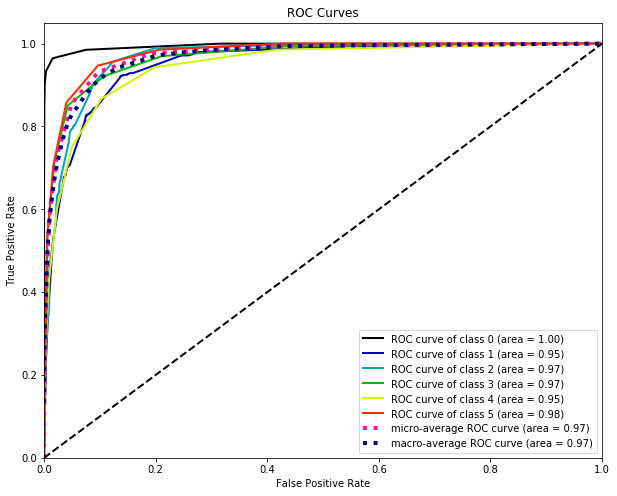

In [45]:
import scikitplot as skplt
y_probas = Model1.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_probas, figsize=(10, 8))   # Plot ROC Curve
File_Name=Model_Name+'_ROC.png'
plt.savefig(File_Name)

In [46]:
from sklearn.metrics import roc_auc_score
#auc = roc_auc_score(y_test, y_probas)

In [47]:
df_performance.columns

Index(['Perfomance Matrix', 'Laying', 'Sitting', 'Stading', 'Walking',
       'Walking_Downstairs', 'Walking_Upstairs', 'micro avg', 'macro avg',
       'weighted avg'],
      dtype='object')

In [48]:
df_performance=df_performance.append({'Perfomance Matrix':"ROC curve_Avergae" ,'macro avg':0.86},ignore_index = True)
print(df_performance)

                  Perfomance Matrix      Laying     Sitting     Stading  \
0                          f1-score    0.952919    0.743381    0.799260   
1                         precision    0.963810    0.743381    0.786885   
2                            recall    0.942272    0.743381    0.812030   
3                           support  537.000000  491.000000  532.000000   
4                 Training Accuracy         NaN         NaN         NaN   
5                     Test Accuracy         NaN         NaN         NaN   
6                        Model_Time         NaN         NaN         NaN   
7                        Specificty    0.992116    0.948697    0.951553   
8         Negative predictive value    0.987201    0.948697    0.958299   
9         Positive Likelihood Ratio  119.519749   14.490027   16.761134   
10        Negative Likelihood Ratio   17.186013    3.696907    5.062261   
11  Overall Misclassification Ratio    0.016966    0.085511    0.073634   
12                ROC cur

In [49]:
df_performance

,Perfomance Matrix,Laying,Sitting,Stading,Walking,Walking_Downstairs,Walking_Upstairs,micro avg,macro avg,weighted avg
0,f1-score,0.952919,0.743381,0.799260,0.818444,0.734300,0.813333,0.814048,0.810273,0.814170
1,precision,0.963810,0.743381,0.786885,0.781651,0.745098,0.853147,0.814048,0.812329,0.815630
2,recall,0.942272,0.743381,0.812030,0.858871,0.723810,0.777070,0.814048,0.809572,0.814048
3,support,537.000000,491.000000,532.000000,496.000000,420.000000,471.000000,2947.000000,2947.000000,2947.000000
4,Training Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996055,NaN
5,Test Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814048,NaN
6,Model_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.235861,NaN
7,Specificty,0.992116,0.948697,0.951553,0.951448,0.958844,0.974556,NaN,NaN,NaN
8,Negative predictive value,0.987201,0.948697,0.958299,0.970858,0.954313,0.958300,NaN,NaN,NaN
9,Positive Likelihood Ratio,119.519749,14.490027,16.761134,17.689855,17.587179,30.540087,NaN,NaN,NaN


In [50]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_probas[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_probas[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
   y_probas.ravel())
average_precision["micro"] = average_precision_score(y_test, y_probas,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.14


In [51]:
df_performance['Model1']="Random Forest Classification"

In [52]:
df_performance['Data Type']= "SmartPhone Sensor Data"

In [53]:

File_Name=Model_Name + '.csv'
df_performance.to_csv(File_Name,index=False)

In [54]:
#df_performance1=df_performance1.append(df_performance)

In [55]:
#df_performance1.to_csv("Performance_data.csv",index=False)